# In Class Activity - Spotify Database - SQL Practice

Instructor: Melissa Laurino</br>
Spring 2025</br>

Name: Joe D'Agostino
</br>
Date: 2/20/25
<br>
<br>

In [1]:
# Load necessary packages:
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation

In [249]:
# Set working directory (If needed)
# commented out as the db is in the same location on my test
#import os
#os.chdir('')

In [82]:
# Create a SQLite database and engine
db_file = "spotify_data.db"
engine = create_engine(f"sqlite:///{db_file}")

In [83]:
# Inspect the database to list the fields
inspector = inspect(engine)
columns = inspector.get_columns("spotify_history")

# Print column names
print("Columns in spotify_history table:")
for col in columns:
    print(col["name"], "-", col["type"])

Columns in spotify_history table:
ts - TEXT
platform - TEXT
ms_played - BIGINT
conn_country - TEXT
ip_addr - TEXT
master_metadata_track_name - TEXT
master_metadata_album_artist_name - TEXT
master_metadata_album_album_name - TEXT
spotify_track_uri - TEXT
episode_name - FLOAT
episode_show_name - FLOAT
spotify_episode_uri - FLOAT
audiobook_title - FLOAT
audiobook_uri - FLOAT
audiobook_chapter_uri - FLOAT
audiobook_chapter_title - FLOAT
reason_start - TEXT
reason_end - TEXT
shuffle - BOOLEAN
skipped - BOOLEAN
offline - BOOLEAN
offline_timestamp - FLOAT
incognito_mode - BOOLEAN
year - BIGINT


For practice, there are not multiple tables in this database. There is only one table named spotify_history.

Metadata for this database can be found here: https://github.com/MelissaLaurino/SpotifyStreamingHistory

We can use COUNT( * ) to summarize and count occurrences in SQL. Use COUNT( * ) below:

Query 1: <br>
Find the top 30 artists listened to in the year 2024.

In [84]:
# select master_metadata_album_artist_name where year = 2024 limit to 30
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT master_metadata_album_artist_name, COUNT(*) AS artist
                    FROM spotify_history
                    WHERE year = 2024
                    GROUP BY master_metadata_album_artist_name
                    ORDER BY artist DESC
                    LIMIT 30
                    """)                      # select columns master_metatdata_album_artist_name and the count assigned to new
                                              # column called artist, from the spotify_history table, where the year is 2024
                                              # groups results including artist by the master_metadata_album_artist_name.
                                              # order by descending value of artist and limit it to 30 results
    top_30_artists = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database
    
# Print the results
top_30_artists

,master_metadata_album_artist_name,artist
0,Miley Cyrus,680
1,Ariana Grande,583
2,Hozier,512
3,Eminem,454
4,Sabrina Carpenter,444
5,Lady Gaga,326
6,Billie Eilish,284
7,Noah Cyrus,282
8,Amy Winehouse,266
9,Teddy Swims,257


Query 2: <br>
Find the top 30 songs listened to in the year 2017.

In [85]:
# select master_metadata_track_name where year = 2017 limit to 30
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT master_metadata_track_name, COUNT(*) AS song
                    FROM spotify_history 
                    WHERE year = 2017
                    GROUP BY master_metadata_track_name
                    ORDER BY song DESC
                    LIMIT 30
                    """)                      # select columns master_metadata_track_name and the count assigned to column song,
                                              # from the spotify_history table, where the year is 2017, group the results by
                                              # master_metadata_track_name, order by descending song count, and limit to 30 results
    top_30_songs = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database
    
# Print the results
top_30_songs

,master_metadata_track_name,song
0,Malibu,223
1,Close,150
2,Shape of You,147
3,It Ain’t Me (with Selena Gomez),117
4,Take Me Down,95
5,Rainbow,95
6,Havana (feat. Young Thug),95
7,Week Without You,88
8,Anyway,86
9,Love Someone,82


Query 3: <br>
Ask a question and create your own! 

Let's try to see what the top 30 most skipped songs were.

In [86]:
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT master_metadata_track_name, COUNT(*) AS song
                    FROM spotify_history 
                    WHERE skipped = TRUE
                    GROUP BY master_metadata_track_name
                    ORDER BY song DESC
                    LIMIT 30
                    """)                      # select columns master_metadata_track_name and the count assigned to column song,
                                              # from the spotify_history table, where skipped is true, group the results by
                                              # master_metadata_track_name, order by descending song count, and limit to 20 results
    top_20_skipped = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database
    
# Print the results
top_20_skipped

,master_metadata_track_name,song
0,Easy On Me,104
1,Flowers,86
2,Too Sweet,84
3,Fade Into You,82
4,Angels Like You,82
5,Shine,78
6,Hallelujah,78
7,All About That Bass,74
8,Will You Still Love Me Tomorrow? - 2011,68
9,Unholy (feat. Kim Petras),67


Honestly, I really don't know enough about music to make a clever observation/comment on which songs you skipped the most.

In [255]:
#Disconnect from the database. Always remember to disconnect :) 
connection.close()

# Assignment #5 - Data Gathering and Warehousing - DSSA-5102

<b>Only Murders in the...Database?</b><br>
An introduction to navigating SQL databases using R and Jupyter Notebook. <br>
<br>
Congrats! You have solved the murder from Assignment #4, let's practice more queries in SQL City! <br>
<br>
Your task for <b>Assignment #5</b> is to complete the following objectives:<br>
You are a data scientist that was hired by SQL City. Your objectives are as follows:<br>
- Objective 1: The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.<br>
- Objective 2: The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime? <br>
- Objective 3: To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?<br><br>
<b>--</b>Add detailed comments to explain EVERY query or SQL command you use while we are still learning and practicing. I have my steps outlined, but please add more cells inbetween for additional queries! There is no limit on the number of queries you can use. <br>
<b>--</b>For each query include comments such as "SELECT all records FROM table WHERE column name = X"<br>
<b>--</b>Answer the prompts in markdown cells. Justify your response. A simple yes/no answer will receive no credit.<br>

Recommended Readings: Chapters 4-7 in Getting Started with SQL by Thomas Nield<br><br>

SQL Dictionary: https://www.w3schools.com/sql/sql_ref_join.asp

This fabulous database was created by @NUKnightLab on Github and can be found here: https://github.com/NUKnightLab/sql-mysteries


In [2]:
# Load necessary libraries
from sqlalchemy import create_engine, inspect, text # Database navigation
import pandas as pd # Python data manilpulation
import matplotlib.pyplot as plt # plot a graph

In [3]:
# Connect to our .db file
db_path = "sql-murder-mystery.db"  # Change this to your actual file name
engine = create_engine(f"sqlite:///{db_path}") # Use the create_engine function to connect to the database
engine # The f is the connection string, so if we print it we can see below

Engine(sqlite:///sql-murder-mystery.db)

In [4]:
# For a quick reference for tables and columns, refer to schema on Blackboard, or list the tables and fields below:
inspector = inspect(engine) # create inspector and assign it the value of our engine (our db)
table_names = inspector.get_table_names() # run the get_table_names() function and assign it to table_names
print(table_names) # print the table names out
# I do really like the graphic shared on Blackboard when wrapping my head around the tables and columns, very helpful to have

['crime_scene_report', 'drivers_license', 'facebook_event_checkin', 'get_fit_now_check_in', 'get_fit_now_member', 'income', 'interview', 'person', 'solution']


In [5]:
# Inspect the crime_scene_report table to list the columns
inspector = inspect(engine)
columns = inspector.get_columns("crime_scene_report")

# Print column names in a pretty for loop like in the practice above
print("Columns in crime_scene_report table:")
for col in columns:
    print(col["name"], "-", col["type"])

Columns in crime_scene_report table:
date - INTEGER
type - TEXT
description - TEXT
city - TEXT


We can use the COUNT command to explore our queries further. COUNT will count the number of records that meet the specified criteria.
Additional examples using COUNT: https://www.w3schools.com/sql/sql_count.asp

In [260]:
#Practice analyzing COUNTS in data tables with SQL queries:
#Brainstorming for Objective 1
#We can find the top ten cities within our Murder Mystery database that had the most crimes by using the COUNT SQL command.
#SELECT the cities that have the most counts within the table crime_scene_report and
#GROUP the results BY city and ORDER BY a DESC count, only show a limit of 10 records:
#practice_cities <- dbSendQuery(db, "SELECT city, COUNT(*) as count
#                            From crime_scene_report
#                            GROUP BY city
#                            ORDER BY count DESC
#                            LIMIT 10")
#dbFetch(practice_cities)

#Looks like SQL City and Murfeesboro have the highest number of crimes! 

#Use COUNT(*) as count to determine the answers to the objectives below. 

<b>Objective 1:</b> The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a bar graph visual to support your recommendation.

In [6]:
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT type, COUNT(*) AS type_count
                    FROM crime_scene_report 
                    GROUP BY type
                    ORDER BY type_count DESC
                    LIMIT 10
                    """)                       # select type and create a count column from crime_scene_report table and group by type colunn
                                               # in descending order by count value and only display 10 records
    top_crime = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database
    
# Print the results
top_crime

,type,type_count
0,murder,148
1,arson,148
2,assault,145
3,theft,141
4,bribery,135
5,robbery,134
6,fraud,130
7,blackmail,130
8,smuggling,117


<b>Murder</b> and <b>Arson</b> seem to be the most common crimes. I'm never moving there if I can help it!

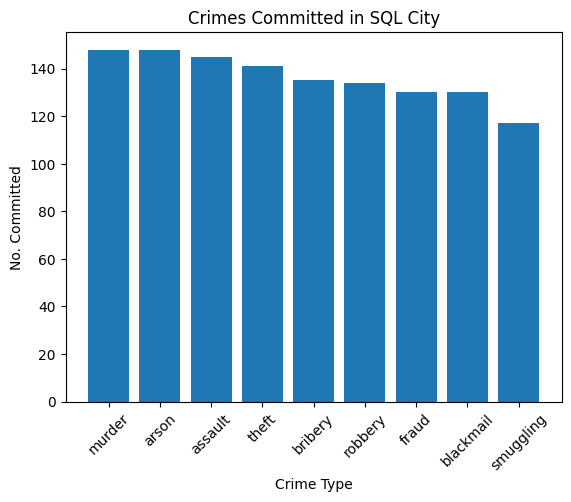

In [7]:
# Graph your results:
# plotting a histogram
plt.bar(top_crime['type'], top_crime['type_count'])

plt.xlabel('Crime Type') # x-axis label
plt.ylabel('No. Committed') # y-axis label
plt.title('Crimes Committed in SQL City') # plot title
plt.xticks(rotation = 45) # let's rotate x-axis labels so they don't overlap

plt.show() # render the plot

Answer:

<b>Objective 2:</b> The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime?

In [8]:
# let's ouput the date first and get an idea
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT date, COUNT(*) AS count
                    FROM crime_scene_report 
                    GROUP BY date
                    ORDER BY count DESC
                    LIMIT 20
                    """)                       # select
    top_date = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database
    
# Print the results
top_date

,date,count
0,20180115,12
1,20180215,6
2,20170820,6
3,20180430,5
4,20180428,5
5,20180427,5
6,20180425,5
7,20180414,5
8,20180402,5
9,20180331,5


Date seems to be an integer, but at least it seems to be an consistant integer. So I have a couple of ideas to try to see the results by month.

In [9]:
# I didn't have luck with a date/month SQL function, but I think substring will work in this case 
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT substr(date, 5, 2) AS month, COUNT(*) AS count
                    FROM crime_scene_report 
                    GROUP BY month
                    ORDER BY count DESC
                    LIMIT 20
                    """)                       # select 2 characters starting by the fifth integer to get the 2 digit month and assign it to month
                                               # also get a new column with the row count as count from crime_scene_report and group the results by 
                                               # the month column and order descending by the count value and limit no more than 20 results (likely be 12 months)
    top_month = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database
    
# Print the results
top_month


,month,count
0,01,179
1,04,159
2,03,147
3,02,134
4,06,89
5,11,88
6,09,85
7,10,75
8,05,74
9,12,71


Answer: <b>January</b> has the most crimes committed. Enjoy the overtime and perhaps buy a new sled or mittens with it.

<b>Objective 3:</b> To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?

In [265]:
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT membership_status, COUNT(*) AS membership_count
                    FROM get_fit_now_member
                    GROUP BY membership_status
                    ORDER BY membership_count
                    """)                         # select the membership_status and the count as membeship_count from get_fit_now_member
                                                 # then group the results by membership_status and oreder by the membership_count
    memberships = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database
    
# Print the results
memberships


,membership_status,membership_count
0,regular,53
1,silver,63
2,gold,68


Answer: The <b>regular</b> membership_status is the least used status by civilians. So let's give the officers a regular membership so 

In [ ]:
#Disconnect from the database. Always remember to disconnect :) 
connection.close()